In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data\Breast_cancer.csv')

In [3]:
df

,ID,sequence,class
0,1,AAWKWAWAKKWAKAKKWAKAA,mod. active
1,2,AIGKFLHSAKKFGKAFVGEIMNS,mod. active
2,3,AWKKWAKAWKWAKAKWWAKAA,mod. active
3,4,ESFSDWWKLLAE,mod. active
4,5,ETFADWWKLLAE,mod. active
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,inactive - virtual
945,946,YLSESVETIKKLGDHITSLKKLW,inactive - virtual
946,947,YPIVDAAMRQLTETG,inactive - virtual
947,948,YQNIVKAVQYAARKLQ,inactive - virtual


In [4]:
df["class"].unique()

array(['mod. active', 'inactive - exp', 'very active',
       'inactive - virtual'], dtype=object)

In [5]:
test_df_abnormal = df[df["class"] == "very active"]

In [6]:
test_df_abnormal

,ID,sequence,class
26,27,FAKKLAKLAKKLAKLAL,very active
27,28,FAKKLAKLAKKLAKLALAL,very active
68,69,FALALKALKKLAKKLKKLAKKAL,very active
85,86,FLGALFKALSKLL,very active
87,88,FLGMIPKLIKKLIKAFK,very active
90,91,FLKLLKKLAAKLF,very active
91,92,FLSLIPKLVKKIIKAFK,very active
92,93,GIGAVLKVLTTGLPALISWIKRKRQQ,very active
99,100,GLFAVIKKVASVIGGL,very active
126,127,KKKFPWWWPFKKKCKKKFPWWWPFKKKC,very active


In [42]:
test_abnormal = test_df_abnormal["sequence"].to_numpy()
np.random.shuffle(test_abnormal)

In [43]:
test_abnormal.shape

(18,)

In [9]:
train_df = df[df["class"] == "inactive - virtual"]

In [10]:
train_df

,ID,sequence,class
199,200,AADIFSKFKKDMEVKFA,inactive - virtual
200,201,AAQKDNVKSSWAKASA,inactive - virtual
201,202,AASQRKLIAEKFAQALMSSL,inactive - virtual
202,203,AAYATLYEALVLVATLAAP,inactive - virtual
203,204,AEAHESIRLVFHDS,inactive - virtual
...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,inactive - virtual
945,946,YLSESVETIKKLGDHITSLKKLW,inactive - virtual
946,947,YPIVDAAMRQLTETG,inactive - virtual
947,948,YQNIVKAVQYAARKLQ,inactive - virtual


In [30]:
train= train_df["sequence"].to_numpy()

In [44]:
train_normal, test_normal = train_test_split(train, test_size = test_abnormal.shape[0]*10, shuffle = True)

In [45]:
train_normal = train_normal

In [46]:
train_normal.shape, test_normal.shape

((570,), (180,))

In [91]:
len(train_normal[4])

19

In [94]:
len(test_abnormal[5])

21

In [47]:
test_abnormal.shape

(18,)

In [52]:
np.unique(train_normal).shape, np.unique(test_normal).shape, np.unique(test_abnormal).shape

((570,), (180,), (18,))

# Applying similarity technique

In [48]:
from importlib import reload
import Kmedoids
Kmedoids = reload(Kmedoids)
from Kmedoids import kMedoids

from Kmedoids import kMedoids
from helper_functions import pairwise_distance, nLCS
from score_distance import distance_k_neighbor, distance_clusters

import matplotlib.pyplot as plt

In [49]:
# The distance matrix is 1-similarity
D  = pairwise_distance(train_normal, nLCS)

D = 1-D
D

array([[0.        , 0.71909968, 0.67974369, ..., 0.71132487, 0.64863582,
        0.71890865],
       [0.71909968, 0.        , 0.59517955, ..., 0.68722838, 0.61930651,
        0.65737586],
       [0.67974369, 0.59517955, 0.        , ..., 0.7226499 , 0.74681516,
        0.69617819],
       ...,
       [0.71132487, 0.68722838, 0.7226499 , ..., 0.        , 0.77178227,
        0.72613872],
       [0.64863582, 0.61930651, 0.74681516, ..., 0.77178227, 0.        ,
        0.6       ],
       [0.71890865, 0.65737586, 0.69617819, ..., 0.72613872, 0.6       ,
        0.        ]])

In [53]:
D_normal = pairwise_distance(test_normal, nLCS, Y = train)

D_normal = 1-D_normal

In [54]:
D_abnormal = pairwise_distance(test_abnormal, nLCS, Y = train)

D_abnormal = 1-D_abnormal

In [55]:
D_normal.shape, D_abnormal.shape

((180, 750), (18, 750))

In [59]:
D.shape

(570, 570)

## Medoids: 10 medoids

In [57]:
# Computing the medoids

n_clusters = 10
M, C = kMedoids(D, n_clusters, init = "random")

M, C

Terminated in 0 iterations


(array([  6,  45,  64,  77, 287, 290, 312, 315, 321, 437]),
 {0: array([  0,   6,   7,   8,  31,  44,  69,  81,  99, 101, 112, 117, 124,
         133, 160, 162, 169, 177, 179, 188, 194, 206, 219, 221, 224, 243,
         247, 250, 262, 266, 274, 286, 298, 301, 317, 318, 320, 328, 330,
         349, 350, 352, 353, 355, 384, 387, 398, 400, 402, 407, 418, 422,
         432, 476, 482, 485, 492, 502, 504, 522, 534, 546, 552, 555, 560],
        dtype=int64),
  1: array([  1,  24,  26,  32,  36,  43,  45,  72,  85,  86,  91,  93, 100,
         105, 125, 136, 141, 142, 150, 155, 163, 178, 186, 187, 196, 212,
         249, 257, 258, 284, 303, 310, 314, 332, 333, 338, 341, 345, 347,
         354, 360, 364, 370, 374, 376, 382, 386, 394, 435, 454, 472, 483,
         486, 491, 512, 517, 537, 540, 548, 551, 562, 569], dtype=int64),
  2: array([ 14,  17,  18,  46,  47,  49,  60,  61,  63,  64,  66,  67,  68,
          75,  82,  83,  84, 104, 107, 123, 129, 130, 138, 149, 159, 165,
         173, 191, 1

In [62]:
# Assigning the clusters
clusters_normal = np.argmin(D_normal[:, M], axis = 1)
clusters_abnormal = np.argmin(D_abnormal[:, M], axis = 1)

In [63]:
# Computing the scores (the smallest distance)
score_normal = np.min(D_normal[:, M], axis = 1)
score_abnormal = np.min(D_abnormal[:, M], axis = 1)

In [64]:
# Computing all the scores:
labels = np.zeros(score_normal.shape[0]+ score_abnormal.shape[0])
labels[score_normal.shape[0]: ] = 1
scores = np.hstack((score_normal, score_abnormal))
scores = np.vstack((scores, labels)).T

In [65]:
scores_sorted = scores[scores[:, 0].argsort()]

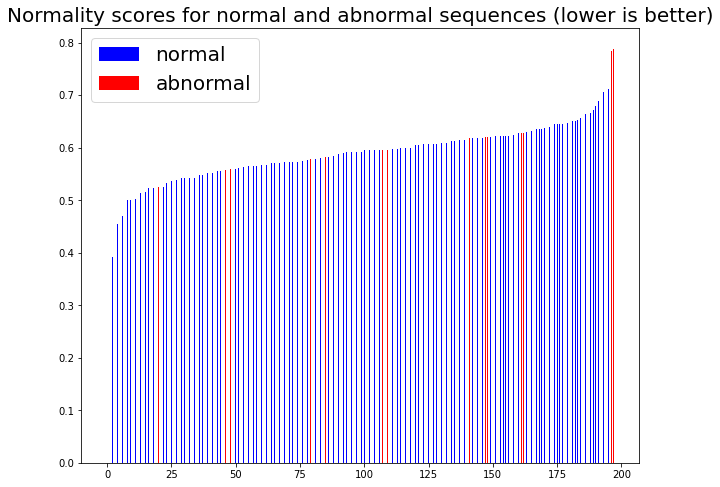

In [66]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [67]:
scores.shape

(198, 2)

In [68]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 2


## Medoids: 3 medoids

In [69]:
# Computing the medoids

n_clusters = 3
M, C = kMedoids(D, n_clusters, init = "random")

M, C

Terminated in 1 iterations


(array([438, 402,  10]),
 {0: array([  0,   3,   9,  12,  14,  15,  16,  17,  18,  19,  21,  22,  23,
          24,  25,  28,  32,  33,  34,  36,  38,  39,  40,  41,  47,  48,
          49,  50,  51,  52,  53,  54,  55,  59,  60,  64,  66,  67,  69,
          70,  73,  78,  80,  83,  84,  85,  86,  88,  89,  90,  94,  95,
          96,  98, 101, 103, 108, 113, 114, 115, 116, 117, 119, 120, 121,
         122, 126, 128, 130, 134, 135, 137, 138, 141, 144, 146, 147, 148,
         151, 152, 154, 157, 162, 163, 164, 165, 173, 175, 180, 181, 187,
         188, 190, 191, 192, 195, 196, 197, 199, 200, 202, 205, 207, 208,
         210, 211, 212, 221, 224, 225, 229, 236, 237, 239, 242, 249, 257,
         261, 267, 270, 271, 275, 276, 277, 279, 282, 287, 291, 293, 297,
         298, 300, 301, 302, 304, 305, 306, 309, 311, 312, 313, 314, 318,
         319, 321, 326, 327, 328, 331, 340, 341, 342, 343, 344, 347, 356,
         358, 361, 362, 368, 373, 375, 378, 380, 383, 391, 394, 396, 397,
         3

In [70]:
# Assigning the clusters
clusters_normal = np.argmin(D_normal[:, M], axis = 1)
clusters_abnormal = np.argmin(D_abnormal[:, M], axis = 1)

In [71]:
# Computing the scores (the smallest distance)
score_normal = np.min(D_normal[:, M], axis = 1)
score_abnormal = np.min(D_abnormal[:, M], axis = 1)

In [72]:
# Computing all the scores:
labels = np.zeros(score_normal.shape[0]+ score_abnormal.shape[0])
labels[score_normal.shape[0]: ] = 1
scores = np.hstack((score_normal, score_abnormal))
scores = np.vstack((scores, labels)).T

In [73]:
scores_sorted = scores[scores[:, 0].argsort()]

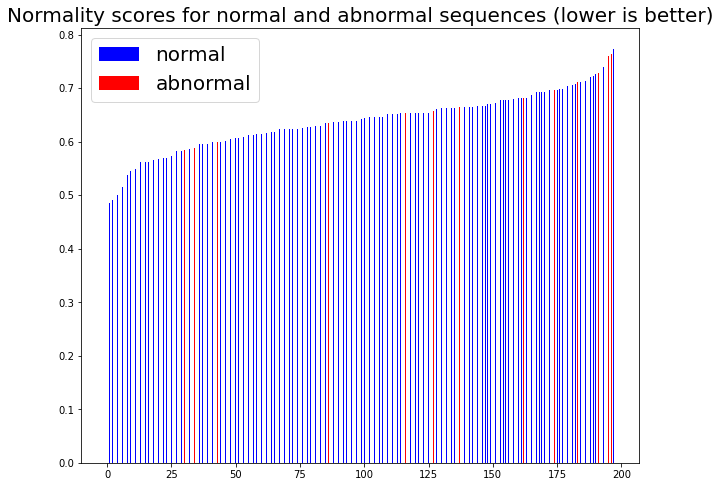

In [74]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [75]:
scores.shape

(198, 2)

In [76]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 4


# K-NN: 1 N

In [77]:
#compute the score given by the distance to the kth nearest neighbor

score_normal_nn = distance_k_neighbor(D_normal, 1)
score_abnormal_nn = distance_k_neighbor(D_abnormal, 1)

In [78]:
# Computing all the scores:
labels = np.zeros(score_normal_nn.shape[0]+ score_abnormal_nn.shape[0])
labels[score_normal_nn.shape[0]: ] = 1
scores = np.hstack((score_normal_nn, score_abnormal_nn))
scores = np.vstack((scores, labels)).T

In [79]:
scores_sorted = scores[scores[:, 0].argsort()]

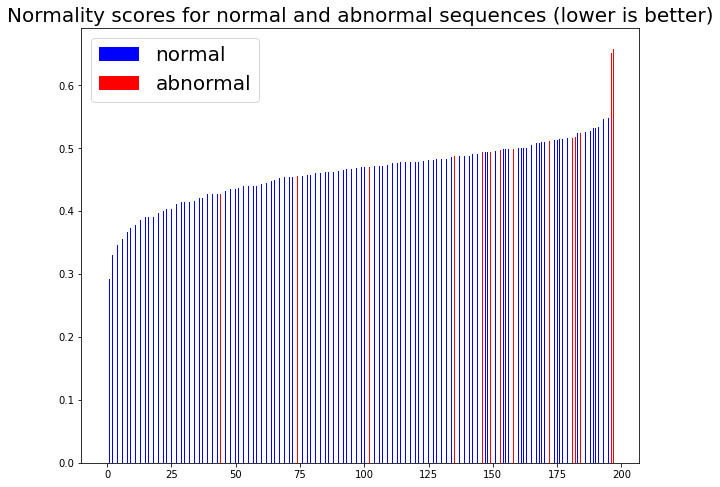

In [80]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [81]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 5


# K-NN: 5 N

In [82]:
#compute the score given by the distance to the kth nearest neighbor

score_normal_nn = distance_k_neighbor(D_normal, 5)
score_abnormal_nn = distance_k_neighbor(D_abnormal, 5)

In [83]:
# Computing all the scores:
labels = np.zeros(score_normal_nn.shape[0]+ score_abnormal_nn.shape[0])
labels[score_normal_nn.shape[0]: ] = 1
scores = np.hstack((score_normal_nn, score_abnormal_nn))
scores = np.vstack((scores, labels)).T

In [84]:
scores_sorted = scores[scores[:, 0].argsort()]

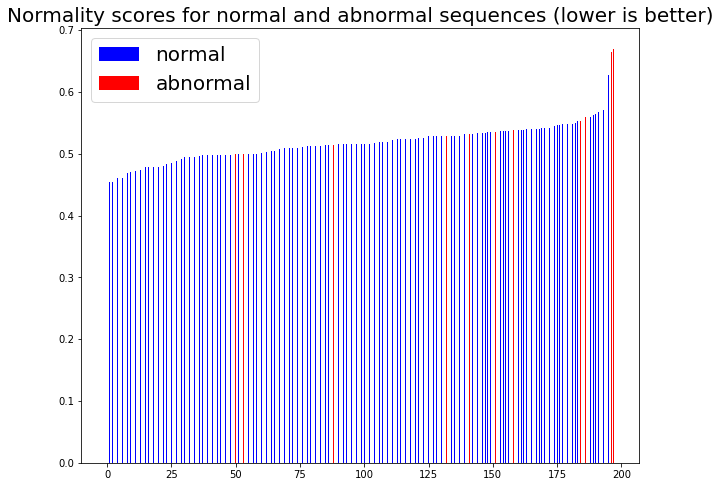

In [85]:

plt.figure(figsize = (10,8))

for i in range(scores.shape[0]):
    if scores_sorted[i, 1] == 0:
        c = "blue"
        label = "normal"
    else:
        c = "red"
        label = "abnormal"
    plt.bar(i, scores_sorted[i, 0], color = c, label = label, width = 0.25)
plt.legend(prop={'size': 20})
plt.title("Normality scores for normal and abnormal sequences (lower is better)", size = 20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size': 20})

In [86]:
ab = np.where(scores_sorted[-20:] == 1)[0].shape[0]

print("The number of abnormalities found is {}".format(ab))

The number of abnormalities found is 4
